<a href="https://colab.research.google.com/github/Fitrahh20/nurulfitrah-UTS-AVD/blob/main/Google_Play_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

Load Dataset untuk membaca file Csv

In [ ]:
df = pd.read_csv('/content/Google Play Store Data.csv')  # Ganti path sesuai tempat upload
print("✅ Data Loaded!")
print("\n📌 Preview Data:")
display(df.head())

✅ Data Loaded!

📌 Preview Data:


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


 Menampilkan ringkasan struktur kolom dan statistik seperti jumlah data, nilai maksimum, rata-rata, dll

In [ ]:
print("\n📊 Info Dataset:")
df.info()
df.describe()

print("\n📈 Statistik Deskriptif:")
display(df.describe(include='all'))



📊 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB

📈 Statistik Deskriptif:


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9659.000000,9659,9659,8196.000000,9.659000e+03,8432.000000,9659,9659,9659,9659,9659,9659,9651,9657
unique,NaN,9659,33,NaN,NaN,NaN,21,2,92,6,118,1377,2769,33
top,NaN,iHoroscope - 2018 Daily Horoscope & Astrology,FAMILY,NaN,NaN,NaN,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,NaN,1,1832,NaN,NaN,NaN,1417,8903,8903,7903,826,252,1055,2202
mean,5666.172896,NaN,NaN,4.173243,2.165926e+05,20.395327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3102.362863,NaN,NaN,0.536625,1.831320e+06,21.827509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,1.000000,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3111.500000,NaN,NaN,4.000000,2.500000e+01,4.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5814.000000,NaN,NaN,4.300000,9.670000e+02,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8327.500000,NaN,NaN,4.500000,2.940100e+04,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 Hapus baris dengan rating kosong atau lebih dari 5. Menampilkan jumlah baris, kolom, dan cek ringkasan statistik kolom Rating setelah filter

In [ ]:
df = df[df['Rating'].notnull()]
df = df[df['Rating'] <= 5]
print(df.shape)
print(df['Rating'].describe())
print(f"Jumlah data setelah filter rating: {df.shape[0]} baris")

(8196, 14)
count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64
Jumlah data setelah filter rating: 8196 baris


Membersihkan dan mengubah nilai pada kolom Installs, Price, dan Size menjadi format numerik agar bisa dianalisis secara statistik atau digunakan dalam model machine learning.

In [ ]:
import numpy as np

df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

def convert_size(size):
    size = str(size)
    if 'M' in size:
        return float(size.replace('M', '').replace(',', '').strip()) * 1_000_000
    elif 'k' in size:
        return float(size.replace('k', '').replace(',', '').strip()) * 1_000
    elif size == 'Varies with device':
        return np.nan
    else:
        return np.nan

df['Size'] = df['Size'].apply(convert_size)


Mmengubah nilai kategori teks di kolom Category, Content Rating, dan Type menjadi angka menggunakan Label Encoding, serta menampilkan hasil mapping-nya.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

categorical_cols = ['Category', 'Content Rating', 'Type']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
    print(f"Label encoding untuk kolom '{col}':")
    for i, class_name in enumerate(le.classes_):
        print(f"  {i} -> {class_name}")
    print("\n")

df[categorical_cols].head()


Label encoding untuk kolom 'Category':
  0 -> ART_AND_DESIGN
  1 -> AUTO_AND_VEHICLES
  2 -> BEAUTY
  3 -> BOOKS_AND_REFERENCE
  4 -> BUSINESS
  5 -> COMICS
  6 -> COMMUNICATION
  7 -> DATING
  8 -> EDUCATION
  9 -> ENTERTAINMENT
  10 -> EVENTS
  11 -> FAMILY
  12 -> FINANCE
  13 -> FOOD_AND_DRINK
  14 -> GAME
  15 -> HEALTH_AND_FITNESS
  16 -> HOUSE_AND_HOME
  17 -> LIBRARIES_AND_DEMO
  18 -> LIFESTYLE
  19 -> MAPS_AND_NAVIGATION
  20 -> MEDICAL
  21 -> NEWS_AND_MAGAZINES
  22 -> PARENTING
  23 -> PERSONALIZATION
  24 -> PHOTOGRAPHY
  25 -> PRODUCTIVITY
  26 -> SHOPPING
  27 -> SOCIAL
  28 -> SPORTS
  29 -> TOOLS
  30 -> TRAVEL_AND_LOCAL
  31 -> VIDEO_PLAYERS
  32 -> WEATHER


Label encoding untuk kolom 'Content Rating':
  0 -> Adults only 18+
  1 -> Everyone
  2 -> Everyone 10+
  3 -> Mature 17+
  4 -> Teen
  5 -> Unrated


Label encoding untuk kolom 'Type':
  0 -> Free
  1 -> Paid




,Category,Content Rating,Type
0,0,1,0
1,0,1,0
2,0,1,0
3,0,4,0
4,0,1,0


Memilih fitur dan target

In [ ]:
features = ['Category', 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating', 'Type']
X = df[features]
y = df['Rating']
print(X.head())
print(y.head())

   Category  Reviews  Size  Installs  Price  Content Rating  Type
0         0      159   NaN     10000    0.0               1     0
1         0      967   NaN    500000    0.0               1     0
2         0    87510   NaN   5000000    0.0               1     0
3         0   215644   NaN  50000000    0.0               4     0
4         0      967   NaN    100000    0.0               1     0
0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64


 Split data training dan testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

      Category  Reviews  Size  Installs  Price  Content Rating  Type
3075        19    65590   NaN   5000000    0.0               1     0
3981        18      377   NaN    100000    0.0               1     0
5402        19      230   NaN     10000    0.0               1     0
6567        26      199   NaN     10000    0.0               1     0
2571        29   148506   NaN   5000000    0.0               1     0
      Category  Reviews  Size  Installs  Price  Content Rating  Type
3007        21    84957   NaN   1000000   0.00               2     0
6005        14       15   NaN        50   0.00               1     0
2241        24    55427   NaN  10000000   0.00               1     0
7663        11     1013   NaN     50000   2.99               1     1
4325        11        7   NaN      1000   0.00               1     0
3075    4.5
3981    3.4
5402    3.9
6567    4.3
2571    4.5
Name: Rating, dtype: float64
3007    4.4
6005    4.6
2241    3.9
7663    4.2
4325    3.9
Name: Rating, dtype: fl

Training model Decision Tree Regression

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

Prediksi dan Evaluasi

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prediksi menggunakan model Decision Tree Regressor
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluasi Decision Tree Regressor")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")


Evaluasi Decision Tree Regressor
R² Score: -0.5889
Mean Squared Error (MSE): 0.49
Mean Absolute Error (MAE): 0.47


Visualisasi perbandingan antara nilai aktual (y_test) dan nilai prediksi (y_pred) dalam bentuk scatter plot, dengan garis merah sebagai referensi yang menunjukkan prediksi yang sempurna, di mana titik-titik prediksi harus sejajar dengan garis tersebut.

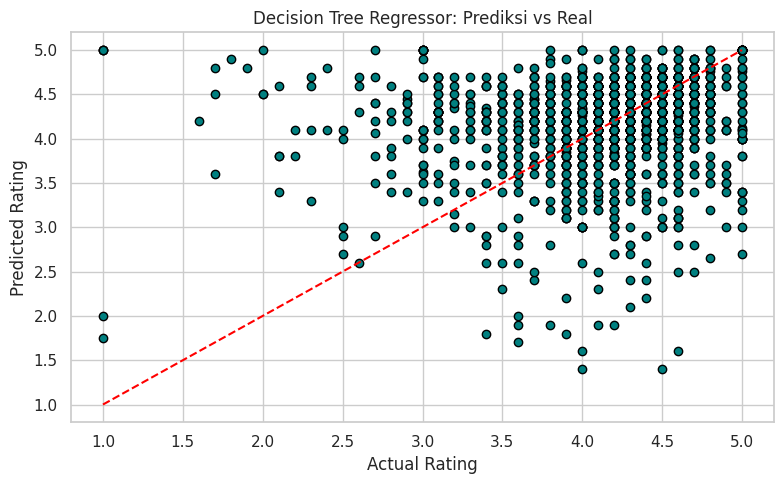

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

#Training Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

#Prediksi
y_pred = model.predict(X_test)

#Visualisasi Prediksi vs Real
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='teal', edgecolor='black')  # Titik prediksi vs aktual
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Garis referensi
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Decision Tree Regressor: Prediksi vs Real")
plt.grid(True)
plt.tight_layout()
plt.show()


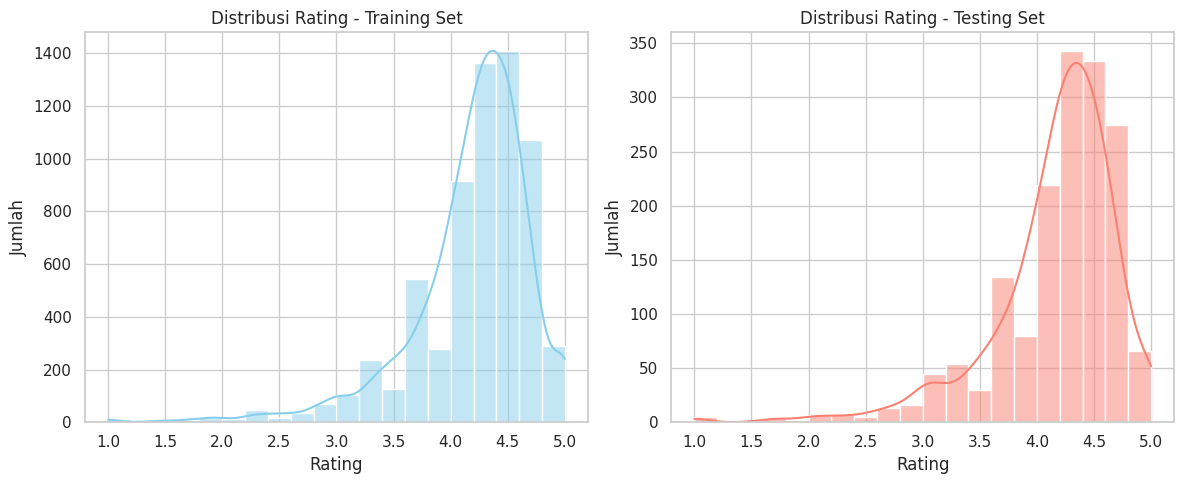

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur style visualisasi
sns.set(style="whitegrid")

# Membuat figure dengan 2 subplot
plt.figure(figsize=(12, 5))

# Distribusi y_train
plt.subplot(1, 2, 1)
sns.histplot(y_train, bins=20, kde=True, color='skyblue')
plt.title('Distribusi Rating - Training Set')
plt.xlabel('Rating')
plt.ylabel('Jumlah')

# Distribusi y_test
plt.subplot(1, 2, 2)
sns.histplot(y_test, bins=20, kde=True, color='salmon')
plt.title('Distribusi Rating - Testing Set')
plt.xlabel('Rating')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()


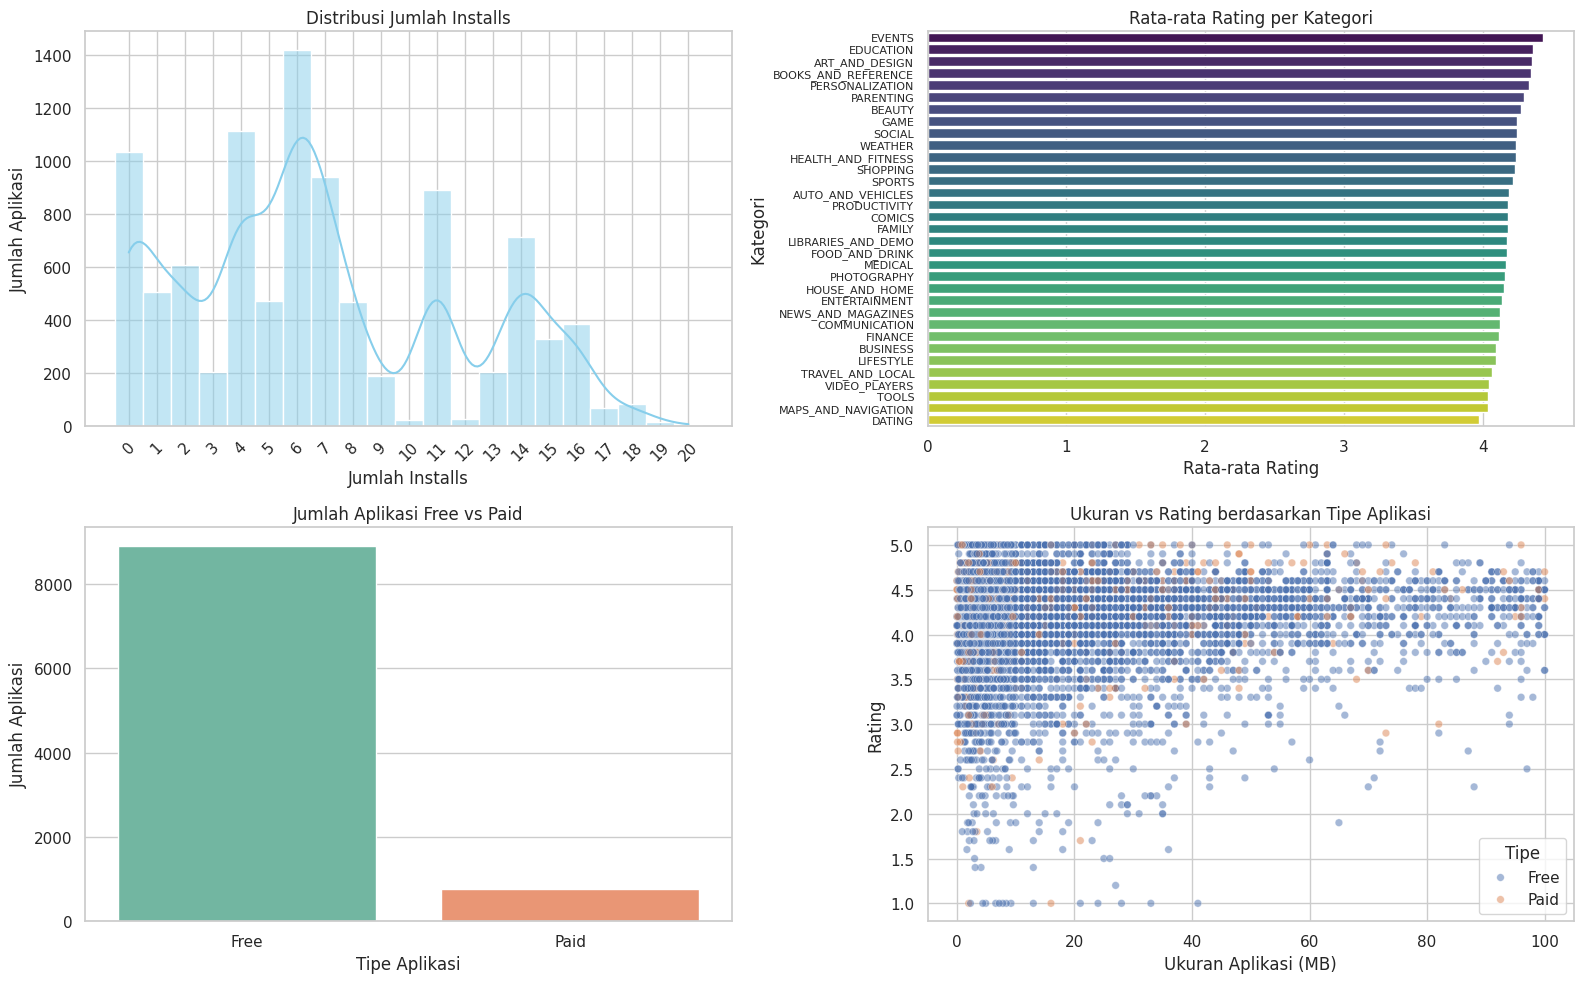

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

# Atur style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))  # Lebar diperbesar agar tidak sempit

# 1. Distribusi Jumlah Installs
plt.subplot(2, 2, 1)
sns.histplot(df['Installs'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Jumlah Installs')
plt.xlabel('Jumlah Installs')
plt.ylabel('Jumlah Aplikasi')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Format angka besar

# 2. Rata-rata Rating per Category
plt.subplot(2, 2, 2)
avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_rating.values, y=avg_rating.index, hue=avg_rating.index, palette='viridis', legend=False)
plt.title('Rata-rata Rating per Kategori')
plt.xlabel('Rata-rata Rating')
plt.ylabel('Kategori')
plt.tick_params(axis='y', labelsize=8)  # Ukuran label kategori diperkecil agar tidak tumpang tindih

# 3. Perbandingan Aplikasi Free vs Paid
plt.subplot(2, 2, 3)
sns.countplot(x='Type', data=df, hue='Type', palette='Set2', legend=False)
plt.title('Jumlah Aplikasi Free vs Paid')
plt.xlabel('Tipe Aplikasi')
plt.ylabel('Jumlah Aplikasi')

# 4. Ukuran vs Rating berdasarkan Tipe Aplikasi
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Size', y='Rating', hue='Type', alpha=0.5, s=30)
plt.title('Ukuran vs Rating berdasarkan Tipe Aplikasi')
plt.xlabel('Ukuran Aplikasi (MB)')
plt.ylabel('Rating')
plt.legend(title='Tipe', loc='lower right')

plt.tight_layout()
plt.show()


#Laporan Hasil Analisis Dataset Google Play Store

#1. Tujuan Analisis
Analisis ini bertujuan untuk mengeksplorasi dan memvisualisasikan data aplikasi Android dari Google Play Store dengan memanfaatkan metode machine learning seperti supervised dan unsupervised learning. Tujuannya adalah untuk memahami pola perilaku pengguna dan aplikasi, serta memberikan insight dan rekomendasi yang relevan bagi pengembang dan pemilik bisnis aplikasi.

#2. Langkah-Langkah Analisis
#a. Pra-pemrosesan Data
    - Membersihkan data dari duplikasi dan nilai kosong (missing values).
    - Mengubah format kolom 'Installs', 'Price', dan 'Size' menjadi numerik agar dapat dianalisis.
    - Melakukan encoding pada kolom kategorikal seperti 'Category', 'Type', dan 'Content Rating' menggunakan LabelEncoder.
#b. Visualisasi
    - Distribusi Jumlah Installs (Histogram): Menunjukkan bahwa sebagian besar aplikasi memiliki jumlah unduhan rendah.
    - Rata-rata Rating per Category (Barplot): Menampilkan kategori aplikasi dengan rating tertinggi, seperti "Events", "Education", dan "Books".
    - Scatterplot Size vs Rating dengan hue Type: Menunjukkan bahwa ukuran aplikasi tidak selalu berkorelasi langsung dengan rating pengguna.

#3. Insight Utama
    - Aplikasi **gratis** mendominasi jumlah total, namun **aplikasi berbayar** cenderung memiliki rating yang sedikit lebih tinggi.
    - Ukuran aplikasi **tidak selalu menentukan rating**, namun ukuran terlalu besar bisa mengurangi kepuasan pengguna terutama di perangkat berspesifikasi rendah.
    - Kategori aplikasi sangat berpengaruh terhadap kualitas dan kepuasan pengguna. Kategori seperti **Education**, **Books**, dan **Events** memiliki rating yang konsisten tinggi.

#4. Rekomendasi
#Untuk Developer Aplikasi:
- Fokus pada kategori dengan **rating tinggi** seperti Education dan Books.
- Optimalkan **ukuran aplikasi** agar tidak terlalu besar dan tetap efisien.
- Pertimbangkan untuk menawarkan **versi berbayar** dengan fitur premium karena aplikasi berbayar memiliki potensi rating lebih tinggi.

#Untuk Strategi Bisnis:
- Gunakan model **regresi** untuk memprediksi rating dari aplikasi baru berdasarkan fitur-fitur yang dimiliki.
- Terapkan **clustering (unsupervised learning)** seperti K-Means untuk mengelompokkan aplikasi berdasarkan karakteristik mereka (installs, size, rating) agar strategi pemasaran lebih tepat sasaran.

#5. Langkah Selanjutnya
- Membangun model supervised learning seperti **Decision Tree** atau **Naive Bayes** untuk klasifikasi.
- Menerapkan metode unsupervised learning seperti **K-Means Clustering** untuk pengelompokan aplikasi berdasarkan karakteristik yang sama.

#**Kesimpulan:**
Analisis ini menunjukkan pentingnya kategori aplikasi, ukuran file, dan jenis aplikasi (gratis atau berbayar) dalam memengaruhi jumlah instalasi dan rating pengguna. Visualisasi dan model prediktif dapat membantu memahami pasar dan membuat keputusan berbasis data yang lebih baik.

*Disusun oleh: [Nurul Fitrah Muhammad Tahir_221031058]*  
*Data: Google Play Store Dataset (Kaggle)*
